In [1]:
import json
import pandas as pd
import numpy as np

In [2]:
#papers_df is pandas dataframe object
papers_df = pd.read_json('temp4.json',lines=True)
papers_df.rename(columns = {"paper_text" : "summary"},inplace=True)
papers_df.head()

,day,id,month,summary,title,year,Topic1,Topic2,Topic3,Author1,Author2,textLink,pdfLink
0,1,1802.00209v1,2,We propose an architecture for VQA which utili...,Dual Recurrent Attention Units for Visual Ques...,2018,cs.AI,cs.CL,cs.CV,Ahmed Osman,Wojciech Samek,http://arxiv.org/abs/1802.00209v1,http://arxiv.org/pdf/1802.00209v1
1,12,1603.03827v1,3,Recent approaches based on artificial neural n...,Sequential Short-Text Classification with Recu...,2016,cs.CL,cs.AI,cs.LG,Ji Young Lee,Franck Dernoncourt,http://arxiv.org/abs/1603.03827v1,http://arxiv.org/pdf/1603.03827v1
2,2,1606.00776v2,6,We introduce the multiresolution recurrent neu...,Multiresolution Recurrent Neural Networks: An ...,2016,cs.CL,cs.AI,cs.LG,Iulian Vlad Serban,Tim Klinger,http://arxiv.org/abs/1606.00776v2,http://arxiv.org/pdf/1606.00776v2
3,23,1705.08142v2,5,Multi-task learning is motivated by the observ...,Learning what to share between loosely related...,2017,stat.ML,cs.AI,cs.CL,Sebastian Ruder,Joachim Bingel,http://arxiv.org/abs/1705.08142v2,http://arxiv.org/pdf/1705.08142v2
4,7,1709.02349v2,9,We present MILABOT: a deep reinforcement learn...,A Deep Reinforcement Learning Chatbot,2017,cs.CL,cs.AI,cs.LG,Iulian V. Serban,Chinnadhurai Sankar,http://arxiv.org/abs/1709.02349v2,http://arxiv.org/pdf/1709.02349v2


In [3]:
print("Papers : ", papers_df.shape)

Papers :  (8000, 13)


In [4]:
papers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   day       8000 non-null   int64 
 1   id        8000 non-null   object
 2   month     8000 non-null   int64 
 3   summary   8000 non-null   object
 4   title     8000 non-null   object
 5   year      8000 non-null   int64 
 6   Topic1    8000 non-null   object
 7   Topic2    8000 non-null   object
 8   Topic3    4319 non-null   object
 9   Author1   8000 non-null   object
 10  Author2   8000 non-null   object
 11  textLink  8000 non-null   object
 12  pdfLink   8000 non-null   object
dtypes: int64(3), object(10)
memory usage: 812.6+ KB


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{3,}',
            ngram_range=(1, 3),
            stop_words = 'english')

papers_df['summary'] = papers_df['summary'].fillna('')


In [6]:
tfv_matrix = tfv.fit_transform(papers_df['summary'])

In [7]:
def Find_Paper_Given_By_Keyword(words_array, keyword):
    index = words.index(keyword)
    the_most_used_on_paper_list = tfv_matrix[:, index].toarray()
    
    #Index the paper id and score
    count = 0
    the_most_used_on_paper_dict = {}
    for i in the_most_used_on_paper_list:
        the_most_used_on_paper_dict[count] = i
        count = count + 1 
        
    #Sort papers which have the most occurrence of  keyword that is given
    top_paper = {k: v for k, v in sorted(the_most_used_on_paper_dict.items(), key=lambda item: item[1],reverse=True)[:10]}
    
    #List in List [[paper_id,title,score]]
    title_list = []
    for i in top_paper.keys():
        title_list.append([i, papers_df.iloc[i].title, top_paper[i][0]])
    df = pd.DataFrame(title_list, columns = ['paper_id', 'title', 'score'])
    return df

In [8]:
words = tfv.get_feature_names()
df = Find_Paper_Given_By_Keyword(words, "algorithm")

In [9]:
df.head(10)

,paper_id,title,score
0,1679,SpCoSLAM 2.0: An Improved and Scalable Online ...,0.311662
1,2340,The threshold EM algorithm for parameter learn...,0.296028
2,2574,Learning to Optimize,0.280716
3,5724,Efficiently Sampling Multiplicative Attribute ...,0.260242
4,5314,Iterative Markov Chain Monte Carlo Computation...,0.230279
5,2201,Learning Causal Structures Using Regression In...,0.228659
6,4535,Online prediction of ovarian cancer,0.219087
7,2169,Reinforcement Learning Algorithm Selection,0.217973
8,5691,Boosting as a Product of Experts,0.199249
9,2329,An Online Learning-based Framework for Tracking,0.197947


In [10]:
#The following code;
#Find the most common words in the corpus(papers_df['summary'])
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{3,}',
            ngram_range=(1, 3),
            stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


In [11]:
vec = CountVectorizer(min_df=3,  max_features=None, 
        strip_accents='unicode', analyzer='word',token_pattern=r'\w{3,}',
        ngram_range=(1, 3),
        stop_words = 'english').fit(papers_df['summary'])

In [12]:
bag_of_words = vec.transform(papers_df['summary'])

In [13]:
bag_of_words

<8000x51318 sparse matrix of type '<class 'numpy.int64'>'
	with 832574 stored elements in Compressed Sparse Row format>

In [14]:
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

In [15]:
words_freq

[('learning', 9427),
 ('data', 7418),
 ('model', 6119),
 ('based', 4643),
 ('models', 4330),
 ('neural', 4113),
 ('networks', 3896),
 ('algorithm', 3871),
 ('network', 3819),
 ('method', 3759),
 ('paper', 3565),
 ('using', 3557),
 ('methods', 3475),
 ('deep', 3432),
 ('results', 3320),
 ('training', 3303),
 ('problem', 3293),
 ('approach', 3162),
 ('performance', 3140),
 ('propose', 3011),
 ('proposed', 2884),
 ('new', 2727),
 ('algorithms', 2615),
 ('classification', 2550),
 ('state', 2500),
 ('time', 2322),
 ('used', 2131),
 ('tasks', 2087),
 ('neural networks', 2073),
 ('image', 2052),
 ('different', 2029),
 ('task', 2005),
 ('features', 1970),
 ('large', 1943),
 ('framework', 1937),
 ('information', 1929),
 ('art', 1893),
 ('state art', 1856),
 ('number', 1851),
 ('function', 1830),
 ('problems', 1800),
 ('use', 1789),
 ('datasets', 1783),
 ('present', 1770),
 ('set', 1761),
 ('work', 1757),
 ('novel', 1729),
 ('demonstrate', 1726),
 ('real', 1667),
 ('machine', 1645),
 ('experimen

In [16]:
top_n_paper_list = get_top_n_words(papers_df['summary'],10)

In [17]:
top_n_paper_df = pd.DataFrame(top_n_paper_list, columns = ["keyword","number"])

In [18]:
top_n_paper_df.head(10)

,keyword,number
0,learning,9427
1,data,7418
2,model,6119
3,based,4643
4,models,4330
5,neural,4113
6,networks,3896
7,algorithm,3871
8,network,3819
9,method,3759


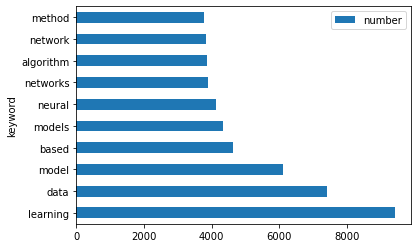

In [19]:
import matplotlib.pyplot as plt
top_n_paper_df.plot.barh(x ='keyword', y='number')
plt.show()

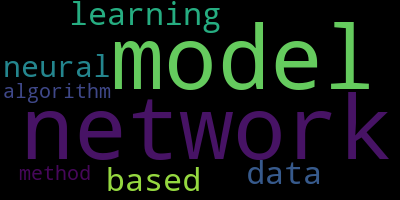

In [20]:
# Import the wordcloud library
import wordcloud

# Join the different processed titles together.
long_string = ' '.join(top_n_paper_df['keyword'])

# Create a WordCloud object, generate a wordcloud and visualise it
wordcloud = wordcloud.WordCloud()

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [32]:
from sklearn.metrics.pairwise import sigmoid_kernel

# Compute the sigmoid kernel
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

In [33]:
sig[0]

array([0.76159574, 0.7615942 , 0.76159425, ..., 0.76159429, 0.76159427,
       0.76159423])

In [34]:
# Reverse mapping of indices and paper titles
indices = pd.Series(papers_df.index, index=papers_df['title']).drop_duplicates()

In [35]:
def give_rec(title, sig=sig):
    # Get the index corresponding to title

    title = 'Semi-supervised Learning with Ladder Networks'
    idx = indices[title]

    # Get the pairwsie similarity scores 
    sig_scores = list(enumerate(sig[idx]))

    # Sort the paper 
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    # Scores of the 10 most similar papers
    sig_scores = sig_scores[1:11]
    
    data = []
    count = 0
    while count<10:
        data.append([sig_scores[count][0],(papers_df['title'].iloc[sig_scores[count][0]]), sig_scores[count][1]])
        count=count+1

    df = pd.DataFrame(data, columns = ["paper_id", "title", "score"])
    return df

In [36]:
# Testing our content-based recommendation system with Genetic Algorithms and its use with back-propagation network
give_rec('Semi-supervised Learning with Ladder Networks').head(10)

,paper_id,title,score
0,1593,Recurrent Ladder Networks,0.761595
1,1584,Learning Disentangled Representations with Sem...,0.761595
2,1645,Good Semi-supervised Learning That Requires a ...,0.761595
3,1368,Structured Generative Adversarial Networks,0.761595
4,1543,Semi-supervised Learning with GANs: Manifold I...,0.761595
5,1317,ExtremeWeather: A large-scale climate dataset ...,0.761595
6,1398,Deconvolutional Paragraph Representation Learning,0.761595
7,1340,Bayesian GAN,0.761595
8,1332,Unsupervised Sequence Classification using Seq...,0.761595
9,1666,Z-Forcing: Training Stochastic Recurrent Networks,0.761594
